<h1 style="text-align:center; font-family:serif;">(Case Study - 1) Analysis Books Scraping</h1>

For this datasets use this url : https://www.kaggle.com/datasets/repl4y/books-scraping

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns

In [7]:
df = pd.read_csv("Books_scrapingV3.csv")

<h2>1.Observe Column in Top and Bottom</h2>

In [11]:
df.shape

(1000, 10)

In [7]:
df.head(5)

,Genre,Title,price,Stock,Star,UPC,Type,Tax,Number of reviews,desc
0,Travel,It's Only the Himalayas,45.17,19,2,a22124811bfa8350,Books,0.0,0,âWherever you go whatever you do just . . ...
1,Travel,Full Moon over Noahâs Ark: An Odyssey to Mou...,49.43,15,4,ce60436f52c5ee68,Books,0.0,0,Acclaimed travel writer Rick Antonson sets his...
2,Travel,See America: A Celebration of Our National Par...,48.87,14,3,f9705c362f070608,Books,0.0,0,To coincide with the 2016 centennial anniversa...
3,Travel,Vagabonding: An Uncommon Guide to the Art of L...,36.94,8,2,1809259a5a5f1d8d,Books,0.0,0,With a new foreword by Tim Ferriss â¢Thereâ...
4,Travel,Under the Tuscan Sun,37.33,7,3,a94350ee74deaa07,Books,0.0,0,A CLASSIC FROM THE BESTSELLING AUTHOR OF UNDER...


In [8]:
df.tail()

,Genre,Title,price,Stock,Star,UPC,Type,Tax,Number of reviews,desc
995,Politics,Why the Right Went Wrong: Conservatism--From G...,52.65,14,4,2b5054a4192e9b06,Books,0.0,0,âDionne's expertise is evident in this finel...
996,Politics,Equal Is Unfair: America's Misguided Fight Aga...,56.86,12,1,3968e3fbf4695d7c,Books,0.0,0,Weâve all heard that the American Dream is v...
997,Cultural,Amid the Chaos,36.58,15,1,bb8245f52c7cce8f,Books,0.0,0,Some people call Eritrea the âNorth Korea of...
998,Erotica,Dark Notes,19.19,15,5,88c21fcd38e2486e,Books,0.0,0,They call me a slut. Maybe I am.Sometimes I do...
999,Crime,The Long Shadow of Small Ghosts: Murder and Me...,10.97,15,1,abeafe151a587d3b,Books,0.0,0,In Cold Blood meets Adrian Nicole LeBlancâs ...


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.0,35.07035,14.446690,10.0,22.1075,35.98,47.4575,59.99
Stock,1000.0,8.58500,5.654622,1.0,3.0000,7.00,14.0000,22.00
Star,1000.0,2.92300,1.434967,1.0,2.0000,3.00,4.0000,5.00
Tax,1000.0,0.00000,0.000000,0.0,0.0000,0.00,0.0000,0.00
Number of reviews,1000.0,0.00000,0.000000,0.0,0.0000,0.00,0.0000,0.00


<h2>2. Check Datatype of Each Column</h2>

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              1000 non-null   object 
 1   Title              1000 non-null   object 
 2   price              1000 non-null   float64
 3   Stock              1000 non-null   int64  
 4   Star               1000 non-null   int64  
 5   UPC                1000 non-null   object 
 6   Type               1000 non-null   object 
 7   Tax                1000 non-null   float64
 8   Number of reviews  1000 non-null   int64  
 9   desc               1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


<h2>3. Check Null In The Dataset</h2>

In [61]:
df.isnull().head()

,Genre,Title,price,Stock,Star,UPC,Type,Tax,Number of reviews,desc
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

Genre                0
Title                0
price                0
Stock                0
Star                 0
UPC                  0
Type                 0
Tax                  0
Number of reviews    0
desc                 0
dtype: int64

<h2>4. Hight And Lowset Price of Book</h2>

In [16]:
df.columns

Index(['Genre', 'Title', 'price', 'Stock', 'Star', 'UPC', 'Type', 'Tax',
       'Number of reviews', 'desc'],
      dtype='object')

<h3>Highest price</h3>

In [63]:
df[df["price"] == df.price.max()]

,Genre,Title,price,Stock,Star,UPC,Type,Tax,Number of reviews,desc
191,Romance,The Perfect Play (Play by Play #1),59.99,4,3,9cc207168a03470d,Books,0.0,0,Football pro Mick Riley is an all-star both o...


<h3>Lowest price</h3>

In [25]:
df[ df["price"] == df.price.min()]

,Genre,Title,price,Stock,Star,UPC,Type,Tax,Number of reviews,desc
781,Young Adult,An Abundance of Katherines,10.0,5,5,f36d24c309e87e5b,Books,0.0,0,Katherine V thought boys were gross Katherine ...


<h2>5. Count The Genres of Books</h2>

Top 5 Genre of Books

In [105]:
df["Genre"].value_counts()

Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Womens Fiction         17
Horror                 17
Science Fiction        16
Science                14
Music                  13
Business               12
Travel                 11
Thriller               11
Philosophy             11
Humor                  10
Autobiography           9
Art                     8
Religion                7
Psychology              7
Spirituality            6
New Adult               6
Christian Fiction       6
Self Help               5
Sports and Games        5
Biography               5
Health                  4
Contemporary            3
Christian               3
Politics    

<h2>6. Top 5 Genres of Books</h2>

In [106]:
df["Genre"].value_counts().head()

Default           152
Nonfiction        110
Sequential Art     75
Add a comment      67
Fiction            65
Name: Genre, dtype: int64

<h2> 7. What is the average price of items in each genre? </h2>

In [8]:
l = df["Genre"].unique()
l2 = []
for x in l:
    l2.append(int(df[df["Genre"] == x]["price"].mean()))
    print(f''' {x}
    average price : {int(df[df["Genre"] == x]["price"].mean())}
    ''')

 Travel
    average price : 39
    
 Mystery
    average price : 31
    
 Historical Fiction
    average price : 33
    
 Sequential Art
    average price : 34
    
 Classics
    average price : 36
    
 Philosophy
    average price : 33
    
 Romance
    average price : 33
    
 Womens Fiction
    average price : 36
    
 Fiction
    average price : 36
    
 Childrens
    average price : 32
    
 Religion
    average price : 32
    
 Nonfiction
    average price : 34
    
 Music
    average price : 35
    
 Default
    average price : 34
    
 Science Fiction
    average price : 33
    
 Sports and Games
    average price : 41
    
 Add a comment
    average price : 35
    
 Fantasy
    average price : 39
    
 New Adult
    average price : 46
    
 Young Adult
    average price : 35
    
 Science
    average price : 33
    
 Poetry
    average price : 35
    
 Paranormal
    average price : 15
    
 Art
    average price : 38
    
 Psychology
    average price : 34
    
 Autobiograph

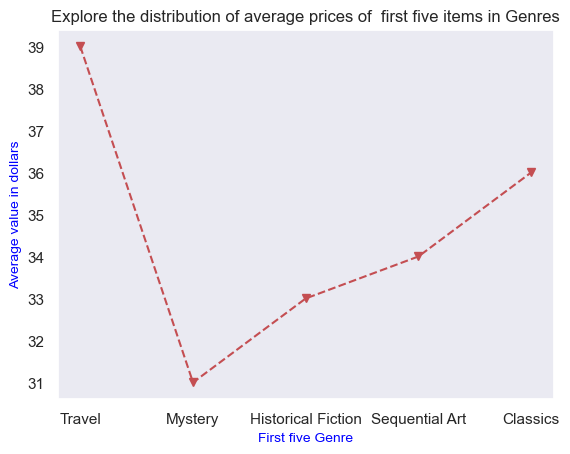

In [9]:
y = np.array(l[:5])
x = np.array(l2[:5])

font1  = {'color':'blue','size':10}
# marker|line|color
plt.plot(y,x, 'v--r')

plt.title("Explore the distribution of average prices of  first five items in Genres")
plt.xlabel("First five Genre", fontdict = font1 )
plt.ylabel("Average value in dollars", fontdict= font1 )
plt.grid()
plt.show()

<AxesSubplot:>

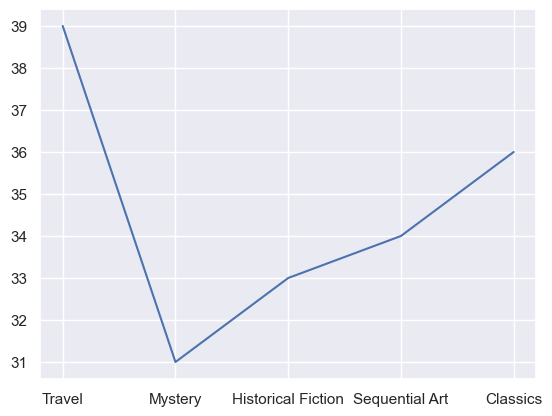

In [12]:
sns.lineplot(x=y,y=x, markers="x") 

<h2> 8. Genre most Popular ? </h2>

In [34]:
df.columns

Index(['Genre', 'Title', 'price', 'Stock', 'Star', 'UPC', 'Type', 'Tax',
       'Number of reviews', 'desc'],
      dtype='object')

In [36]:
df["Genre"].value_counts().head(1)

Default    152
Name: Genre, dtype: int64

<h2> 9. What is the average star rating for each genre? </h2>

In [37]:
df.columns

Index(['Genre', 'Title', 'price', 'Stock', 'Star', 'UPC', 'Type', 'Tax',
       'Number of reviews', 'desc'],
      dtype='object')

In [126]:
l = df["Genre"].unique()
for x in l:
    print(f''' {x}
    average star : {int(df[df["Genre"] == x]["Star"].mean())}
    ''')

 Travel
    average star : 2
    
 Mystery
    average star : 2
    
 Historical Fiction
    average star : 3
    
 Sequential Art
    average star : 2
    
 Classics
    average star : 2
    
 Philosophy
    average star : 2
    
 Romance
    average star : 2
    
 Womens Fiction
    average star : 3
    
 Fiction
    average star : 3
    
 Childrens
    average star : 2
    
 Religion
    average star : 3
    
 Nonfiction
    average star : 2
    
 Music
    average star : 3
    
 Default
    average star : 2
    
 Science Fiction
    average star : 2
    
 Sports and Games
    average star : 3
    
 Add a comment
    average star : 2
    
 Fantasy
    average star : 3
    
 New Adult
    average star : 3
    
 Young Adult
    average star : 3
    
 Science
    average star : 2
    
 Poetry
    average star : 3
    
 Paranormal
    average star : 1
    
 Art
    average star : 3
    
 Psychology
    average star : 1
    
 Autobiography
    average star : 3
    
 Parenting
    average

<h2> 11. How many unique UPC codes are there in the dataset? </h2>

In [51]:
len(df["UPC"].unique())

1000

<h2> 10. What is the total revenue generated by each genre, taking into account the price, tax, and number of items sold? </h2>

In [128]:
l = df["Genre"].unique()

for x in l:
    total = df[ df["Genre"] == x]["price"].sum()
    print(f'''{x}:
    *Total revenue : {int(total)}
    ''' )

Travel:
    *Total revenue : 437
    
Mystery:
    *Total revenue : 1015
    
Historical Fiction:
    *Total revenue : 874
    
Sequential Art:
    *Total revenue : 2592
    
Classics:
    *Total revenue : 694
    
Philosophy:
    *Total revenue : 369
    
Romance:
    *Total revenue : 1187
    
Womens Fiction:
    *Total revenue : 625
    
Fiction:
    *Total revenue : 2344
    
Childrens:
    *Total revenue : 946
    
Religion:
    *Total revenue : 227
    
Nonfiction:
    *Total revenue : 3768
    
Music:
    *Total revenue : 463
    
Default:
    *Total revenue : 5227
    
Science Fiction:
    *Total revenue : 540
    
Sports and Games:
    *Total revenue : 205
    
Add a comment:
    *Total revenue : 2398
    
Fantasy:
    *Total revenue : 1900
    
New Adult:
    *Total revenue : 278
    
Young Adult:
    *Total revenue : 1914
    
Science:
    *Total revenue : 463
    
Poetry:
    *Total revenue : 683
    
Paranormal:
    *Total revenue : 15
    
Art:
    *Total revenue : 308
  

<h2> 12.Which item has the most reviews, and what is its star rating ? </h2>

In [116]:
len(df[df["Star"] == 5])

196

<h2> 13.How many items have a price above a certain threshold  '25DH'? </h2>

In [53]:
df.columns

Index(['Genre', 'Title', 'price', 'Stock', 'Star', 'UPC', 'Type', 'Tax',
       'Number of reviews', 'desc'],
      dtype='object')

In [57]:
len(df[df["price"] > 25])

701

<h2> 14. Which genre has the most items in stock</h2>

In [118]:
df[df["Stock"] == df["Stock"].max()]["Genre"]

812    Poetry
Name: Genre, dtype: object

<h2 style="color: green; text-align:center;">  Make a random number reviews ....</h2>

In [61]:
new_Column = df["Number of reviews"].apply(lambda  x : int(rd.randrange(0,350))).rename("Number of reviews RD")
df2 = pd.concat([df, new_Column], axis=1)
df2.drop('Number of reviews', inplace=True, axis=1)


<h2> 15. Determine the top 5 products with the highest number of reviews.</h2>

In [62]:
df2.columns

Index(['Genre', 'Title', 'price', 'Stock', 'Star', 'UPC', 'Type', 'Tax',
       'desc', 'Number of reviews RD'],
      dtype='object')

In [91]:
df2[["Title" , "price","Star","Number of reviews RD"]].nlargest(5,"Number of reviews RD")

,Title,price,Star,Number of reviews RD
300,Luis Paints the World,53.95,3,349
691,"Saga, Volume 6 (Saga (Collected Editions) #6)",25.02,3,349
306,Maybe Something Beautiful: How Art Transformed...,22.54,1,348
224,The Edge of Reason (Bridget Jones #2),19.18,4,347
559,Harry Potter and the Sorcerer's Stone (Harry P...,13.90,3,347


<h2>17 . Find out the average star rating of products with a price higher than $25.</h2>

In [101]:
df2[df2["price"] == df2["price"]]["Star"].mean()

2.923